In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings("ignore")
import os
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("RestaurantRatings_Dataset.csv")
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [4]:
#To print the columns name
df.columns 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# Get the data type of each column
column_types = df.dtypes
print("Column Types:")
print(column_types)

Column Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [6]:
df.shape

(9551, 21)

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# Step 1: Filtering rows where any column is null
null_any_df = df[df.isna().any(axis=1)]

null_any_df

Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W Main St, Dahlonega, GA 30533   
328           Macon                   543 Cherry St, Macon, GA 31201   
346          Miller             109 N Broadway Ave, Miller, SD 57362   
368         Orlando  215 South Orlando Avenue, Winter Park, FL 32789   
418  Rest of Hawaii             933 Kapahulu Ave, Honolulu, HI 96816   
455        Savannah          1311 Butler Ave, Tybee Island, GA 31328   

         Locality         Locality Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200      NaN   
87         Albany           Albany, Albany  -84.175900  31.588200      NaN   
94         Albany           Albany, Albany  -84.153400  31.575100      NaN   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800      NaN   
328         Macon             Macon, Macon  -83.627979  32.836410      NaN   
346        Miller           Miller, Miller  -98.989100  44.515800      NaN   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682      NaN   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586      NaN   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810      NaN   

     ...   Currency Has Table booking Has Online delivery Is delivering now  \
84   ...  Dollar($)                No                  No                No   
87   ...  Dollar($)                No                  No                No   
94   ...  Dollar($)                No                  No                No   
297  ...  Dollar($)                No                  No                No   
328  ...  Dollar($)                No                  No                No   
346  ...  Dollar($)                No                  No                No   
368  ...  Dollar($)                No                  No                No   
418  ...  Dollar($)                No                  No                No   
455  ...  Dollar($)                No                  No                No   

    Switch to order menu Price range  Aggregate rating  Rating color  \
84                    No           1               3.4        Orange   
87                    No           1               3.4        Orange   
94                    No           1               3.9        Yellow   
297                   No           3               3.9        Yellow   
328                   No           3               3.8        Yellow   
346                   No           1               3.4        Orange   
368                   No           3               4.4         Green   
418                   No           1               4.7    Dark Green   
455                   No           1               3.9        Yellow   

    Rating text Votes  
84      Average    34  
87      Average    36  
94         Good   160  
297        Good   209  
328        Good   102  
346     Average    11  
368   Very Good  1158  
418   Excellent   707  
455        Good   309  

[9 rows x 21 columns]

In [9]:
# Step 2: Filling missing values with 'Unknown' in the filtered DataFrame
null_any_df1 = null_any_df.fillna('Unknown')
null_any_df1

Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W Main St, Dahlonega, GA 30533   
328           Macon                   543 Cherry St, Macon, GA 31201   
346          Miller             109 N Broadway Ave, Miller, SD 57362   
368         Orlando  215 South Orlando Avenue, Winter Park, FL 32789   
418  Rest of Hawaii             933 Kapahulu Ave, Honolulu, HI 96816   
455        Savannah          1311 Butler Ave, Tybee Island, GA 31328   

         Locality         Locality Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200  Unknown   
87         Albany           Albany, Albany  -84.175900  31.588200  Unknown   
94         Albany           Albany, Albany  -84.153400  31.575100  Unknown   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800  Unknown   
328         Macon             Macon, Macon  -83.627979  32.836410  Unknown   
346        Miller           Miller, Miller  -98.989100  44.515800  Unknown   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682  Unknown   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586  Unknown   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810  Unknown   

     ...   Currency Has Table booking Has Online delivery Is delivering now  \
84   ...  Dollar($)                No                  No                No   
87   ...  Dollar($)                No                  No                No   
94   ...  Dollar($)                No                  No                No   
297  ...  Dollar($)                No                  No                No   
328  ...  Dollar($)                No                  No                No   
346  ...  Dollar($)                No                  No                No   
368  ...  Dollar($)                No                  No                No   
418  ...  Dollar($)                No                  No                No   
455  ...  Dollar($)                No                  No                No   

    Switch to order menu Price range  Aggregate rating  Rating color  \
84                    No           1               3.4        Orange   
87                    No           1               3.4        Orange   
94                    No           1               3.9        Yellow   
297                   No           3               3.9        Yellow   
328                   No           3               3.8        Yellow   
346                   No           1               3.4        Orange   
368                   No           3               4.4         Green   
418                   No           1               4.7    Dark Green   
455                   No           1               3.9        Yellow   

    Rating text Votes  
84      Average    34  
87      Average    36  
94         Good   160  
297        Good   209  
328        Good   102  
346     Average    11  
368   Very Good  1158  
418   Excellent   707  
455        Good   309  

[9 rows x 21 columns]

In [10]:
# Step 3: Filling missing values in the original DataFrame
df_filled = df.fillna('Unknown')
df_filled 

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [11]:
df_filled.duplicated().sum()

0

In [12]:
# List comprehension to get unique values, their counts, and the number of null values for each column
unique_values_counts = {
    col: {
        "unique_count": df_filled[col].nunique(),
        "null_count": df_filled[col].isnull().sum(),
        "unique_values": df_filled[col].unique()
    } 
    for col in df_filled.columns
}

# Display the results
for col, info in unique_values_counts.items():
    print(f"Column: {col}")
    print(f"  Unique values count: {info['unique_count']}")
    print(f"  Null values count: {info['null_count']}")
    print(f"  Unique values: {info['unique_values']}\n")

Column: Restaurant ID
  Unique values count: 9551
  Null values count: 0
  Unique values: [6317637 6304287 6300002 ... 5915807 5916112 5927402]

Column: Restaurant Name
  Unique values count: 7446
  Null values count: 0
  Unique values: ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]

Column: Country Code
  Unique values count: 15
  Null values count: 0
  Unique values: [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]

Column: City
  Unique values count: 141
  Null values count: 0
  Unique values: ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fer

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [14]:
# Select relevant features for prediction
relevant_features = [ 'Country Code', 'City'
       , 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes']
    

# Create a new DataFrame with relevant features
df_relevant = df_filled[relevant_features]

# Display the DataFrame with relevant features
df_relevant.head(6)

Country Code              City   Longitude   Latitude  \
0           162       Makati City  121.027535  14.565443   
1           162       Makati City  121.014101  14.553708   
2           162  Mandaluyong City  121.056831  14.581404   
3           162  Mandaluyong City  121.056475  14.585318   
4           162  Mandaluyong City  121.057508  14.584450   
5           162  Mandaluyong City  121.056314  14.583764   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   
5                           Chinese                  1000  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   
5                No                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   
5                   No            3               4.4        Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229  
5   Very Good    336

In [15]:
df_relevant.shape

(9551, 16)

In [16]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(df_relevant )

# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])


In [17]:
# Example model pipeline with RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.029499619570905227
Mean Absolute Error (MAE): 0.1146106750392463
R-squared (R²): 0.987039452110378


## Linear Regression

In [20]:
# the linear regression here 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model
# Example model pipeline with LinearRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None))
])
# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)






Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', LinearRegression())])

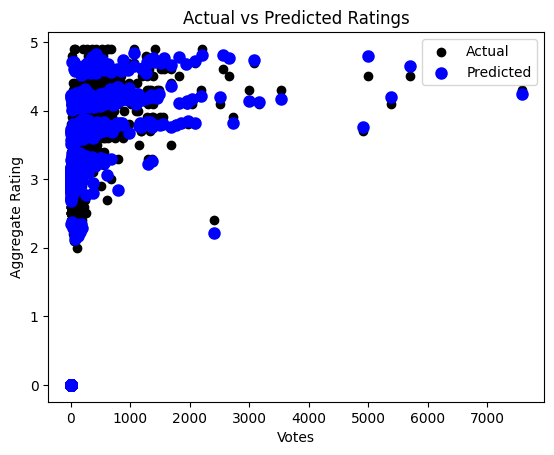

In [21]:
# Plot outputs using 'Votes' feature from X_test
votes_index = X.columns.get_loc('Votes')  # Get the index of the 'Votes' feature
votes_test = X_test.iloc[:, votes_index]  # Extract 'Votes' feature from X_test

plt.scatter(votes_test, y_test, color="black", label="Actual")
plt.scatter(votes_test, y_pred, color="blue", linewidth=3, label="Predicted")

plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.legend()
plt.title('Actual vs Predicted Ratings')

plt.show()


## logistic regression

In [22]:
#logistic regression 
from sklearn.linear_model import Ridge
# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])

# Example model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',  Ridge(alpha=1.0))  # alpha is the regularization strength
])

# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [23]:
model.fit(X_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', Ridge())])

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'RMSE: {RMSE}')

Mean Squared Error (MSE): 0.022204049790592345
Mean Absolute Error (MAE): 0.10548423074171538
R-squared (R²): 0.9902447334968906
RMSE: 0.14901023384517034


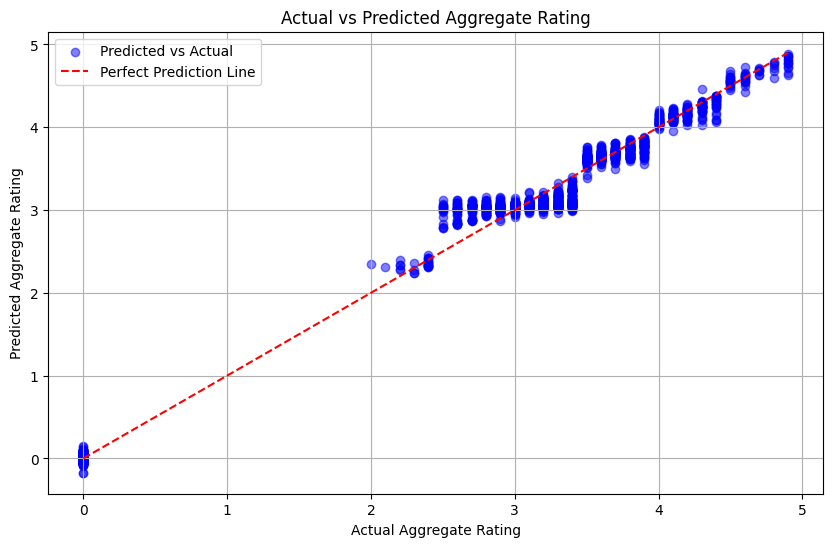

In [25]:
# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Rating')
plt.legend()
plt.grid(True)
plt.show()

## Lasso regression 

In [26]:
#Lasso regression 
from sklearn.linear_model import Lasso
# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])

# Example model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',   Lasso(alpha=1.0))  # alpha is the regularization strength
])

# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model.fit(X_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', Lasso())])

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

# Printing the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'RMSE: {RMSE}')

Mean Squared Error (MSE): 2.2761089903094835
Mean Absolute Error (MAE): 1.2043035980241628
R-squared (R²): 0.0
RMSE: 1.5086778948170094


## Visualization

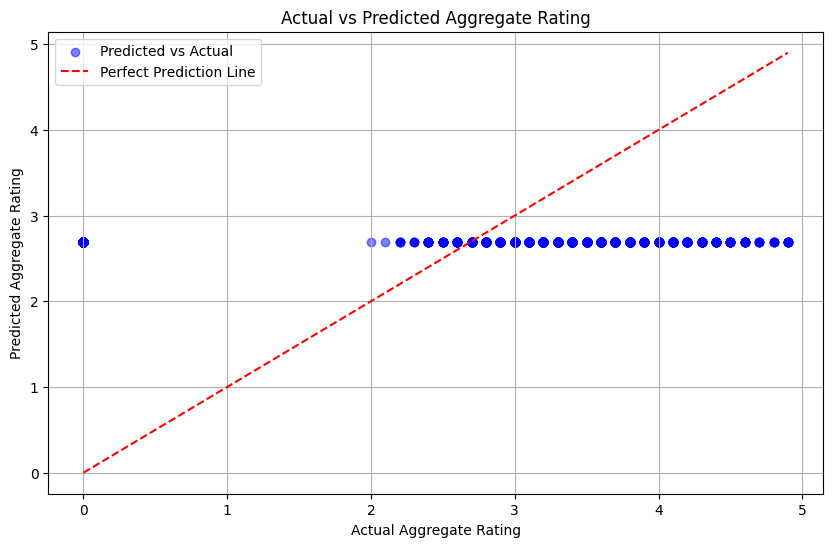

In [29]:
# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Rating')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Selecting the first three data instances from the test set
X_sample = X_test[:3]

# Predicting on the selected instances
y_sample_pred = model.predict(X_sample)

# Displaying the predictions
print("Predicted Aggregate Ratings for the first three instances:")
for i, pred in enumerate(y_sample_pred, 1):
    print(f"Instance {i}: {pred:.2f}")


Predicted Aggregate Ratings for the first three instances:
Instance 1: 2.69
Instance 2: 2.69
Instance 3: 2.69


In [31]:
import folium
import pandas as pd

# Assuming X_test has the full data and y_pred has the corresponding predictions
# If not, replace X_test with the appropriate DataFrame and y_pred with corresponding predictions
full_data = X_test.copy()
full_data['Predicted Rating'] = y_pred

# Initialize the map centered around the mean latitude and longitude of the data
map_center = [full_data['Latitude'].mean(), full_data['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers to the map for each data point
for _, row in full_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Predicted Rating: {row['Predicted Rating']:.2f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# Save the map to an HTML file or display it in a Jupyter Notebook
mymap.save("predictions_map.html")


In [32]:
mymap

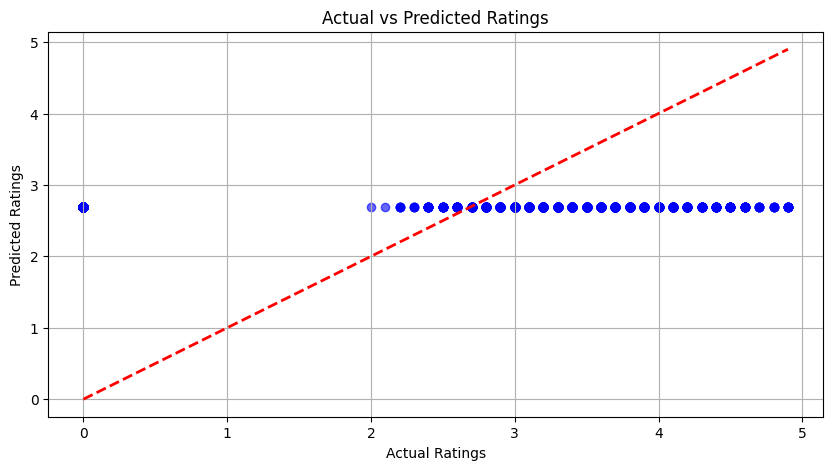

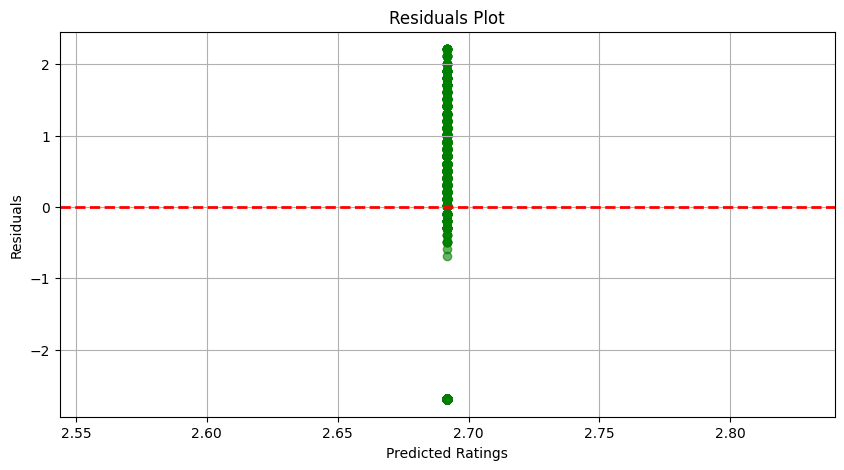

In [34]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 5))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()

# Visualization: Residuals plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# **ElasticNet Regression**
ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [35]:
#Lasso regression 
from sklearn.linear_model import ElasticNet
# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])

# Example model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha = 0.01))# alpha is the regularization strength
])

# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model.fit(X_test, y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', ElasticNet(alpha=0.01))])

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
# Printing the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'RMSE: {RMSE}')

Mean Squared Error (MSE): 0.04171473463443485
Mean Absolute Error (MAE): 0.15849780440506223
R-squared (R²): 0.981672786842794
RMSE: 0.2042418532877991


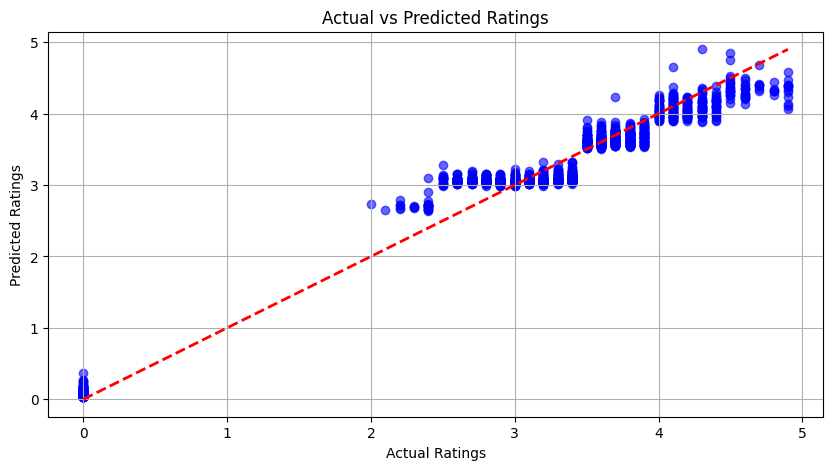

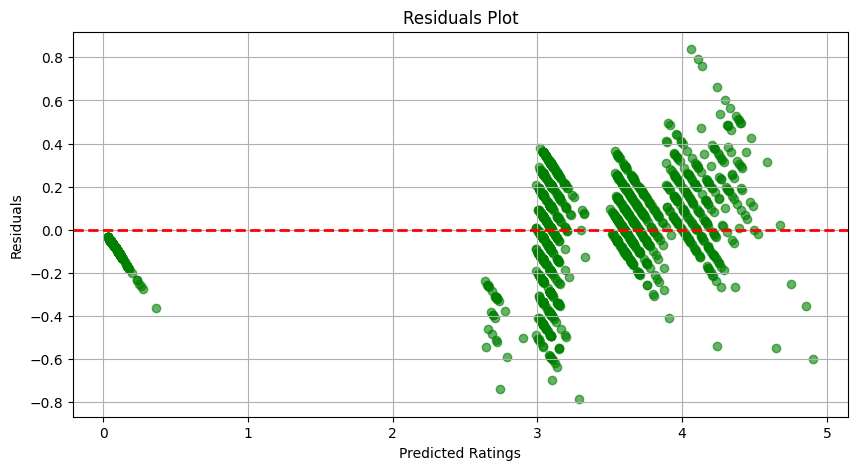

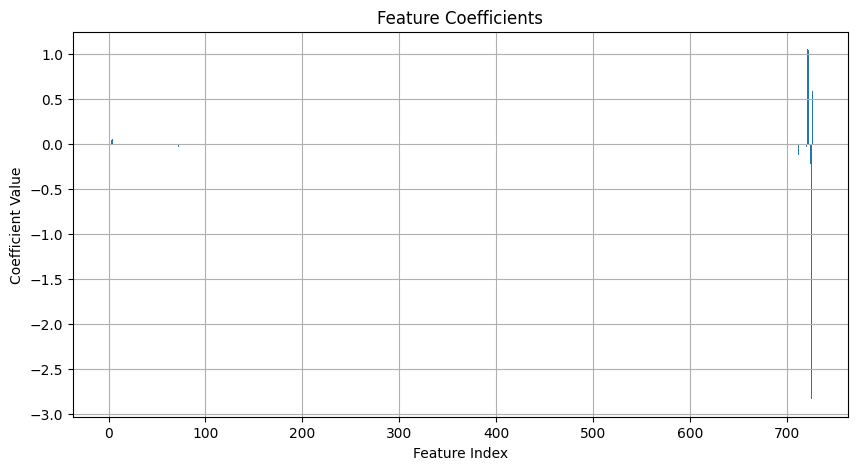

In [38]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Coefficients Plot
coefficients = model.named_steps['regressor'].coef_
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.title('Feature Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

In [39]:
 
# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])

# Example model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',SVR(kernel='rbf')) # alpha is the regularization strength
])

# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model.fit(X_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor', SVR())])

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
# Printing the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'RMSE: {RMSE}')

Mean Squared Error (MSE): 0.0331458109091944
Mean Absolute Error (MAE): 0.11624701071588488
R-squared (R²): 0.9854375115381941
RMSE: 0.18205991021967027


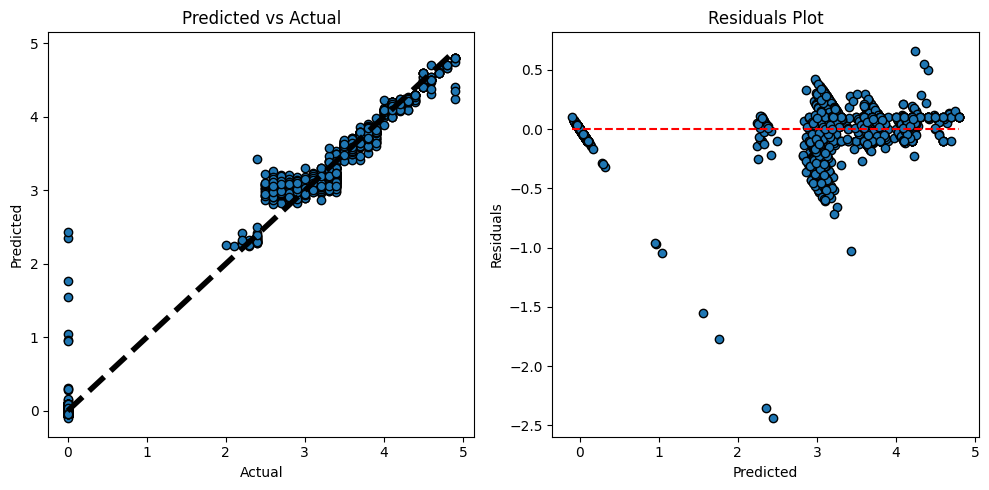

In [42]:
# Predicted vs. Actual Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')

# Residuals Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

In [43]:
#DecisionTreeRegressor 
# Define the Column Transformer with StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']),
        ('city_cuisine', OneHotEncoder(handle_unknown='ignore'), ['City', 'Cuisines']),
        ('has', OneHotEncoder(drop='if_binary'), ['Has Table booking', 'Has Online delivery', 'Is delivering now']),
        ('currency', OneHotEncoder(handle_unknown='ignore'), ['Currency']),
        ('rating_text', OrdinalEncoder(), ['Rating text']),
        ('rating_color', OneHotEncoder(handle_unknown='ignore'), ['Rating color']),
    ])

# Example model pipeline with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=2, min_samples_split=2, min_samples_leaf=1,random_state=42)) # alpha is the regularization strength
])

# Split data into train and test sets
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model.fit(X_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Longitude', 'Latitude',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('city_cuisine',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Cuisines']),
                                                 ('has',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now']),
                                                 ('currency',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Currency']),
                                                 ('rating_text',
                                                  OrdinalEncoder(),
                                                  ['Rating text']),
                                                 ('rating_color',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Rating color'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=2, random_state=42))])

In [45]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.1076539910811167
Mean Absolute Error (MAE): 0.21144298064166803
R-squared (R²): 0.9527026203316921
Root Mean Squared Error (RMSE): 0.3281066763738841


Feature names (count: 727):
['Longitude' 'Latitude' 'Average Cost for two' 'Price range' 'Votes'
 'City_Abu Dhabi' 'City_Agra' 'City_Ahmedabad' 'City_Albany'
 'City_Allahabad' 'City_Amritsar' 'City_Ankara' 'City_Athens'
 'City_Auckland' 'City_Augusta' 'City_Aurangabad' 'City_Bangalore'
 'City_Beechworth' 'City_Bhopal' 'City_Bhubaneshwar' 'City_Birmingham'
 'City_Boise' 'City_Bras�_lia' 'City_Cape Town'
 'City_Cedar Rapids/Iowa City' 'City_Chandigarh' 'City_Chatham-Kent'
 'City_Chennai' 'City_Coimbatore' 'City_Colombo' 'City_Columbus'
 'City_Dalton' 'City_Davenport' 'City_Dehradun' 'City_Des Moines'
 'City_Doha' 'City_Dubai' 'City_Dubuque' 'City_Edinburgh' 'City_Faridabad'
 'City_Fernley' 'City_Flaxton' 'City_Gainesville' 'City_Ghaziabad'
 'City_Goa' 'City_Gurgaon' 'City_Guwahati' 'City_Hepburn Springs'
 'City_Hyderabad' 'City_Indore' 'City_Jaipur' 'City_Jakarta'
 'City_Johannesburg' 'City_Kanpur' 'City_Kochi' 'City_Kolkata'
 'City_Lakes Entrance' 'City_Lakeview' 'City_London' 'City_Lor

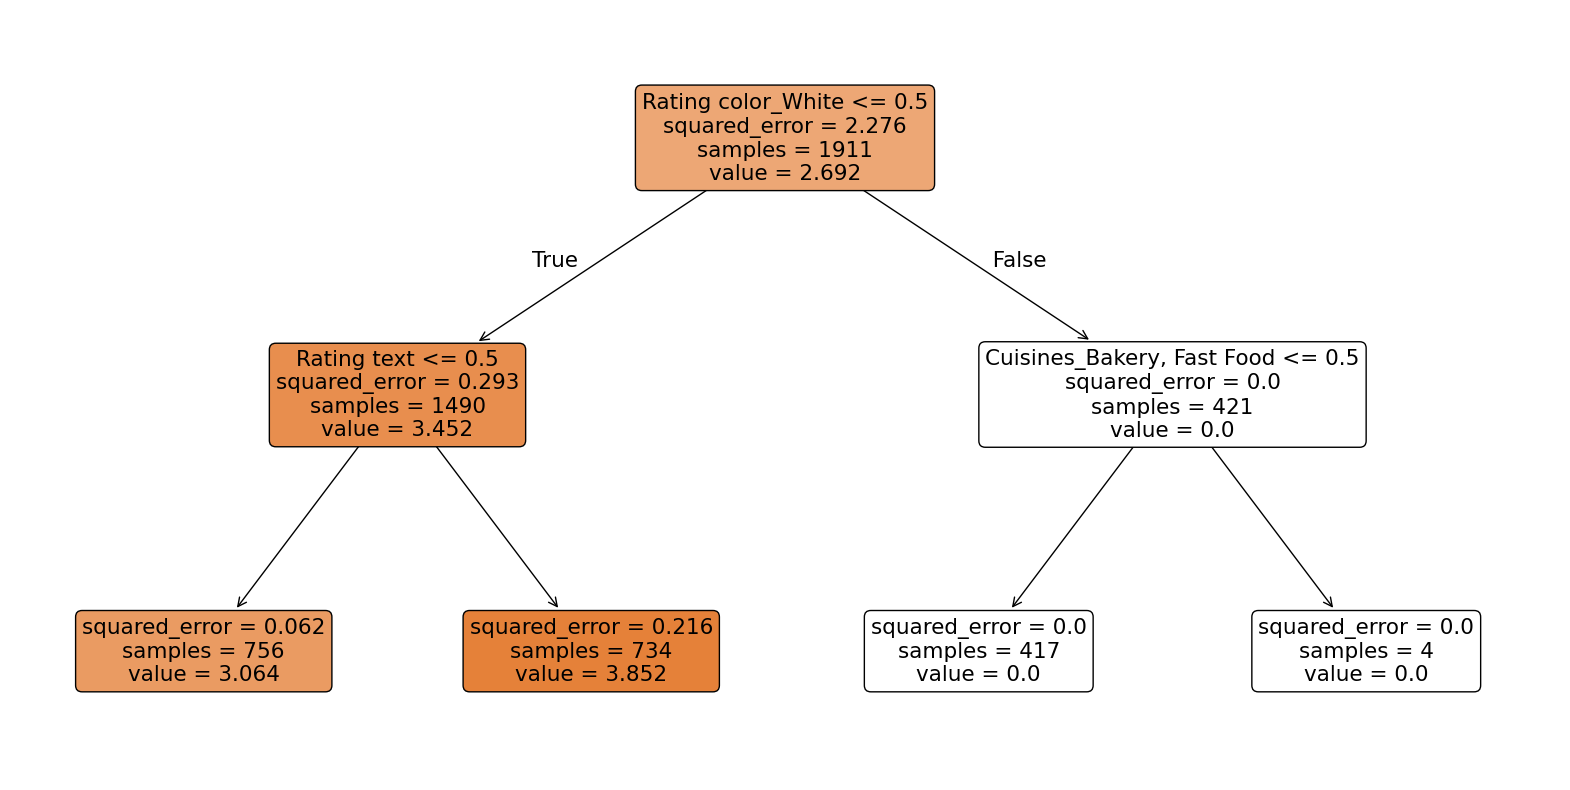

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 


# Extract the preprocessed feature names
onehot_cols_city_cuisine = preprocessor.named_transformers_['city_cuisine'].get_feature_names_out(['City', 'Cuisines'])
onehot_cols_has = preprocessor.named_transformers_['has'].get_feature_names_out(['Has Table booking', 'Has Online delivery', 'Is delivering now'])
onehot_cols_currency = preprocessor.named_transformers_['currency'].get_feature_names_out(['Currency'])
onehot_cols_rating_color = preprocessor.named_transformers_['rating_color'].get_feature_names_out(['Rating color'])
ordinal_cols = ['Rating text']
numeric_cols = ['Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']
feature_names = np.concatenate([numeric_cols, onehot_cols_city_cuisine, onehot_cols_has, onehot_cols_currency, ordinal_cols, onehot_cols_rating_color])

# Print the feature names to verify
print(f"Feature names (count: {len(feature_names)}):\n{feature_names}")

# Extract the trained Decision Tree Regressor from the pipeline
decision_tree = model.named_steps['regressor']

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_names, rounded=True)
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define the models to compare
models = {
    'Linear Regression': LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Elastic Net': ElasticNet(alpha=0.01)
}

# Initialize results dataframe
results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Evaluate each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and model fitting
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store the results
    model_results = pd.DataFrame([[model_name, mse, mae, r2, rmse]], columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])
    results = pd.concat([results, model_results], ignore_index=True)

# Display the results in table format
print(results)


                       Model       MSE       MAE        R2      RMSE
0          Linear Regression  0.034559  0.137079  0.984817  0.185899
1           Ridge Regression  0.031636  0.131528  0.986101  0.177864
2           Lasso Regression  0.209427  0.375445  0.907989  0.457632
3              Decision Tree  0.107915  0.211482  0.952588  0.328503
4              Random Forest  0.029500  0.114611  0.987039  0.171755
5  Support Vector Regression  0.041939  0.143076  0.981574  0.204791
6                Elastic Net  0.041508  0.158035  0.981764  0.203734


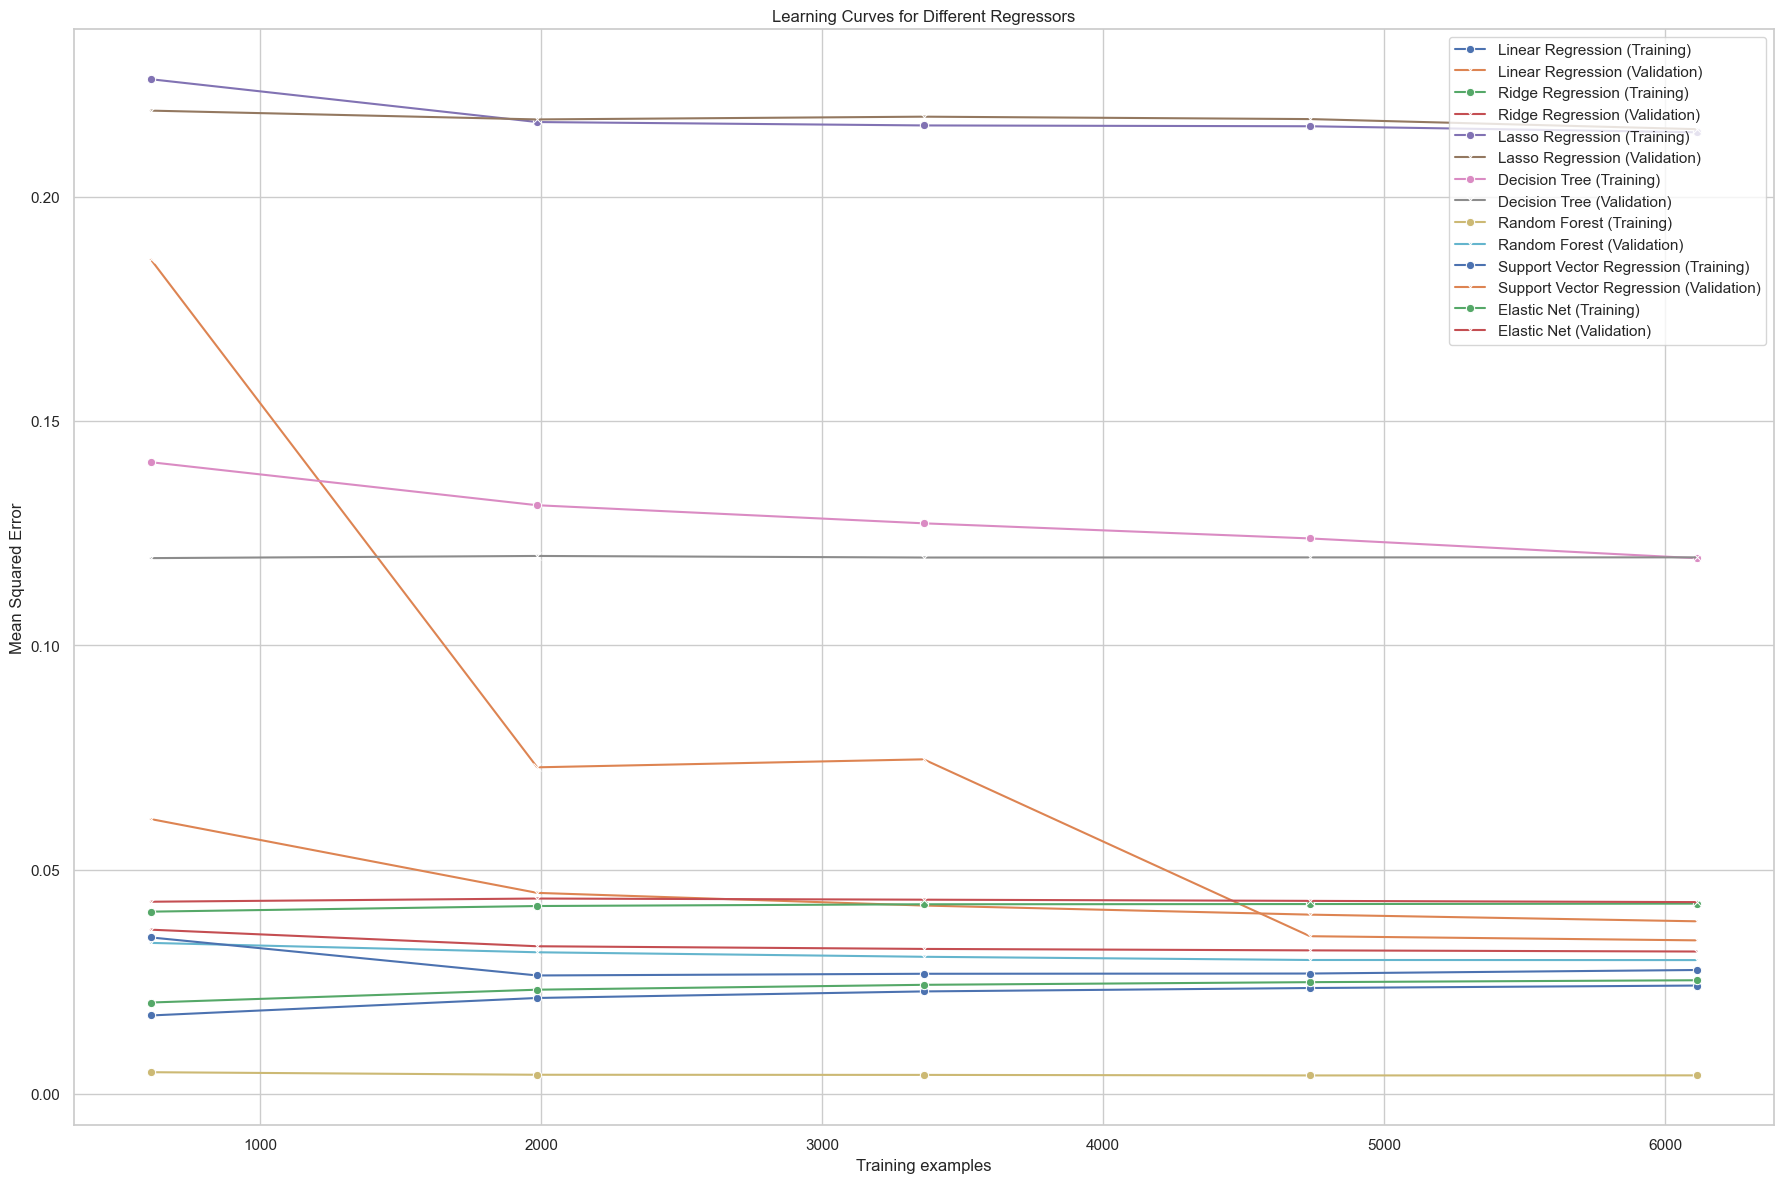

In [48]:
# Plotting using seaborn
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    
    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    sns.lineplot(x=train_sizes, y=train_scores_mean, label=f'{model_name} (Training)', marker='o')
    sns.lineplot(x=train_sizes, y=test_scores_mean, label=f'{model_name} (Validation)', marker='x')

plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Different Regressors')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis and Interpretation of Regression Model Performance
This section evaluates various regression models applied to predict the target variable Aggregate rating based on features such as location, cuisine type, cost, and other restaurant attributes. We assessed the models using key metrics: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R²), and Root Mean Squared Error (RMSE).

#1. Linear Regression
MSE: 0.0346
MAE: 0.1371
R²: 0.9848
RMSE: 0.1859
Linear Regression serves as a fundamental model, demonstrating strong performance with an R² value of 0.9848. This indicates that approximately 98.5% of the variance in Aggregate rating is explained by the model's features. The relatively low MSE and RMSE values suggest the model's predictions closely align with actual ratings.

#2. Ridge Regression
MSE: 0.0316
MAE: 0.1315
R²: 0.9861
RMSE: 0.1779
Ridge Regression, which includes L2 regularization, enhances model performance by slightly reducing overfitting compared to Linear Regression. The model achieves the lowest MSE and RMSE among all tested models, indicating superior accuracy and stability. The high R² value of 0.9861 suggests that the model effectively captures the variability in Aggregate rating based on the provided features.

#3. Lasso Regression
MSE: 0.2094
MAE: 0.3754
R²: 0.9080
RMSE: 0.4576
Lasso Regression, incorporating L1 regularization, shows higher errors, with a noticeable increase in MSE and RMSE. The R² value of 0.9080 indicates that while the model explains a significant portion of the variance, it does not perform as well as other models like Ridge Regression. The inclusion of L1 regularization helps in feature selection but may result in higher bias.

#4. Decision Tree Regressor
MSE: 0.1079
MAE: 0.2115
R²: 0.9526
RMSE: 0.3285
The Decision Tree model provides a non-linear approach to the data, offering interpretability in terms of decision rules. However, its performance, with an R² of 0.9526, is slightly lower compared to linear models. The higher MSE and RMSE suggest some overfitting, where the model may capture noise rather than true underlying patterns.

#5. Random Forest Regressor
MSE: 0.0295
MAE: 0.1146
R²: 0.9870
RMSE: 0.1718
The Random Forest Regressor, an ensemble method, delivers the best performance across all metrics. Its low MSE and RMSE, coupled with a high R² of 0.9870, indicate exceptional predictive accuracy and robustness. This model effectively captures complex interactions between features and is less prone to overfitting than the Decision Tree.

#6. Support Vector Regression (SVR)
MSE: 0.0419
MAE: 0.1431
R²: 0.9816
RMSE: 0.2048
SVR with an RBF kernel demonstrates good performance, balancing bias and variance. The R² value of 0.9816 reflects a strong capability to model the target variable, with a slight trade-off in complexity and computational cost compared to simpler models.

#7. Elastic Net
MSE: 0.0415
MAE: 0.1580
R²: 0.9818
RMSE: 0.2037
Elastic Net, combining both L1 and L2 regularization, offers a middle ground between Ridge and Lasso regression. Its performance, indicated by an R² of 0.9818, suggests effective handling of feature selection and multicollinearity, though with marginally higher errors than Ridge Regression.

Conclusion
The comparative analysis reveals that Random Forest Regressor and Ridge Regression are the top-performing models, providing the most accurate predictions for Aggregate rating. The choice of the model should align with the project's objectives, considering factors like interpretability, computational efficiency, and data characteristics. For applications prioritizing accuracy and robustness, Random Forest Regressor is recommended, while Ridge Regression offers a simpler and equally effective alternative for scenarios requiring model interpretability.






